In [1]:
import keypress_recognition.models as models
from keypress_recognition import dataset_p as dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

In [2]:
concat = False
delta = 3 if concat else 1
channels = 3 * delta

In [3]:
bmodel = models.get_black_key_model(channels)

In [4]:
dataset.load_all_data(color=['black'], size=['single'], keypress=True, concatenate=concat, delta=delta)

Start seperating keyboard ...
  White single width: 21px
  Black single width: 20px
  White bundle width: 37px
  Black bundle width: 36px


IntProgress(value=0, max=14273)

In trainset: 
  # of pressed black key: 8755
  # of unpressed black key: 43747


IntProgress(value=0, max=5000)

In testset: 
  # of pressed black key: 761
  # of unpressed black key: 22685


IntProgress(value=0, max=2993)

In valset: 
  # of pressed black key: 817
  # of unpressed black key: 10811


In [5]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Y" if note else "N")

def display_concat_img(img, idx=None):
    if concat:
        if idx is None:
            return img[:, :, :, 3:6]
        else:
            return img[idx, :, :, 3:6]
    if idx is None:
        return img
    else:
        return img[idx, :, :, :]


Samples from X_train: 


IntProgress(value=0, max=87494)

(2, 106, 20, 3)
1 0
Samples from X_test: 


IntProgress(value=0, max=45370)

(2, 106, 20, 3)
1 0
Samples from X_val: 


IntProgress(value=0, max=21622)

(2, 106, 20, 3)
1 0


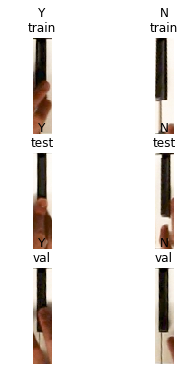

In [6]:
# print several images with labels
fig, axarr = plt.subplots(3, 2, figsize=[4, 6])
for ii, _type in enumerate(['train', 'test', 'val']):

    print(f'Samples from X_{_type}: ')

    for imgb, noteb in dataset.data_batch(type=_type, size='single', color='black', batch_size=2, NCHW=False, need_velocity=False, concatenate=concat):
        print(imgb.shape)
        print(noteb[0], noteb[1])
        axarr[ii,0].imshow(cv2.cvtColor(display_concat_img(imgb, 0), cv2.COLOR_BGR2RGB))
        axarr[ii,0].set_title(visualize_keys(noteb[0]) + '\n' + _type)
        axarr[ii,0].axis('off')
        axarr[ii,1].imshow(cv2.cvtColor(display_concat_img(imgb, 1), cv2.COLOR_BGR2RGB))
        axarr[ii,1].set_title(visualize_keys(noteb[1]) + '\n' + _type)
        axarr[ii,1].axis('off')
        break

plt.show()

In [18]:
bmodel.train(dataset, batch_size=32, size='single', color='black',
             concatenate=concat,
             num_epochs=20,
             weight_decay=0.05,
             max_num=-1,
             learning_rate=5e-4,
             decay_every=5,
             best_path='keypress_recognition/best_black_model.tar',
             current_path='keypress_recognition/current_black.tar',
             method=0)

Epoch 1/20


IntProgress(value=0, max=87494)

train Loss: 0.2611
[[40989  1811]
 [ 2771 41949]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=21622)

val Loss: 0.1942
[[10247   158]
 [  569 10658]]
Precision: 0.95
Recall   : 0.99
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 2/20


IntProgress(value=0, max=87494)

train Loss: 0.2621
[[40971  1793]
 [ 2789 41967]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=21622)

val Loss: 0.1878
[[10583   440]
 [  233 10376]]
Precision: 0.98
Recall   : 0.96
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 3/20


IntProgress(value=0, max=87494)

train Loss: 0.2614
[[40933  1735]
 [ 2827 42025]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=21622)

val Loss: 0.3106
[[10672  1003]
 [  144  9813]]
Precision: 0.99
Recall   : 0.91
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 4/20


IntProgress(value=0, max=87494)

train Loss: 0.2600
[[41046  1743]
 [ 2714 42017]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=21622)

val Loss: 0.1854
[[10460   262]
 [  356 10554]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 5/20


IntProgress(value=0, max=87494)

train Loss: 0.2597
[[40982  1786]
 [ 2778 41974]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=21622)

val Loss: 0.2860
[[10646   967]
 [  170  9849]]
Precision: 0.98
Recall   : 0.91
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 6/20


IntProgress(value=0, max=87494)

train Loss: 0.2340
[[41336  1446]
 [ 2424 42314]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1610
[[10492   222]
 [  324 10594]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 7/20


IntProgress(value=0, max=87494)

train Loss: 0.2248
[[41441  1368]
 [ 2319 42392]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1607
[[10541   264]
 [  275 10552]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 8/20


IntProgress(value=0, max=87494)

train Loss: 0.2223
[[41475  1352]
 [ 2285 42408]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1589
[[10539   235]
 [  277 10581]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 9/20


IntProgress(value=0, max=87494)

train Loss: 0.2197
[[41492  1338]
 [ 2268 42422]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1569
[[10523   250]
 [  293 10566]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 10/20


IntProgress(value=0, max=87494)

train Loss: 0.2194
[[41503  1322]
 [ 2257 42438]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1529
[[10520   214]
 [  296 10602]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 11/20


IntProgress(value=0, max=87494)

train Loss: 0.2158
[[41513  1249]
 [ 2247 42511]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1553
[[10517   209]
 [  299 10607]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 12/20


IntProgress(value=0, max=87494)

train Loss: 0.2150
[[41532  1270]
 [ 2228 42490]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1545
[[10518   228]
 [  298 10588]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 13/20


IntProgress(value=0, max=87494)

train Loss: 0.2148
[[41545  1268]
 [ 2215 42492]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1534
[[10523   239]
 [  293 10577]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 14/20


IntProgress(value=0, max=87494)

train Loss: 0.2147
[[41529  1277]
 [ 2231 42483]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1551
[[10543   275]
 [  273 10541]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 15/20


IntProgress(value=0, max=87494)

train Loss: 0.2135
[[41566  1279]
 [ 2194 42481]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1575
[[10550   278]
 [  266 10538]]
Precision: 0.98
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 16/20


IntProgress(value=0, max=87494)

train Loss: 0.2141
[[41546  1257]
 [ 2214 42503]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1530
[[10518   243]
 [  298 10573]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 17/20


IntProgress(value=0, max=87494)

train Loss: 0.2144
[[41535  1265]
 [ 2225 42495]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1562
[[10542   265]
 [  274 10551]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 18/20


IntProgress(value=0, max=87494)

train Loss: 0.2136
[[41558  1278]
 [ 2202 42482]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1559
[[10524   212]
 [  292 10604]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 19/20


IntProgress(value=0, max=87494)

train Loss: 0.2142
[[41548  1268]
 [ 2212 42492]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1523
[[10518   224]
 [  298 10592]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
The best model has been saved to keypress_recognition/best_black_model.tar ...
Current mode has been saved to keypress_recognition/current_black.tar ...

Epoch 20/20


IntProgress(value=0, max=87494)

train Loss: 0.2141
[[41546  1277]
 [ 2214 42483]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=21622)

val Loss: 0.1525
[[10521   225]
 [  295 10591]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black.tar ...

Training complete in 17m 27s
Best val loss: 0.152283


IntProgress(value=0, max=45370)

(12, 106, 20, 3)
tensor([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)


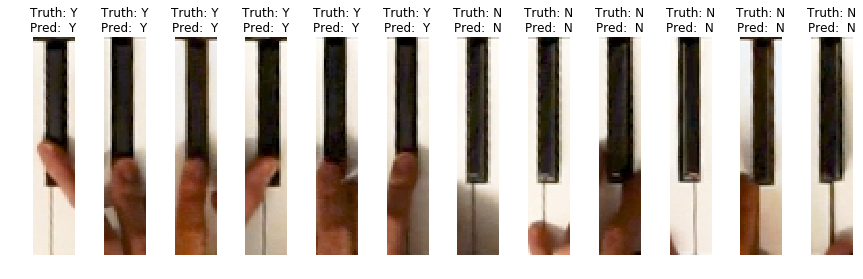

In [15]:
example_batch = 12
fig, axarr = plt.subplots(1, example_batch, figsize=(15,4))
for imgb, noteb in dataset.data_batch(type='test', size='single', color='black', batch_size=example_batch, NCHW=True, need_velocity=False, concatenate=concat):
    yb = bmodel.evaluate(imgb, threshold=0.5)
    imgb = np.transpose(imgb, (0, 2, 3, 1))
    print(imgb.shape)
    print(yb)
    for i in range(example_batch):
        axarr[i].imshow(cv2.cvtColor(display_concat_img(imgb, i), cv2.COLOR_BGR2RGB))
        axarr[i].set_title('Truth: ' + visualize_keys(noteb[i]) + '\nPred:  ' + visualize_keys(yb[i]))
        axarr[i].axis('off')
    break
plt.show()